# Project 1

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset.

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. 

Build a better way to interpret them through supervised machine learning.

## Your assignment

Apply Artificial Neural Network supervised machine learning techniques to this data set and validate it by applying K-Fold cross validation (K=10).

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Many optimization techniques provide the means of "hyperparameters" to be tuned (e.g. Genetic Algorithms). Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters.

Below it's described the set of steps that outline the development of this project, with some guidance and hints. If you're up for a real challenge, try doing this project from scratch in a new, clean notebook!


## Let's begin: prepare your data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv("mammographic_masses.data.txt", sep=",", header=None, na_values = '?').astype('float64')

Make sure you use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity):

In [2]:
data.columns = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]

Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [3]:
data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

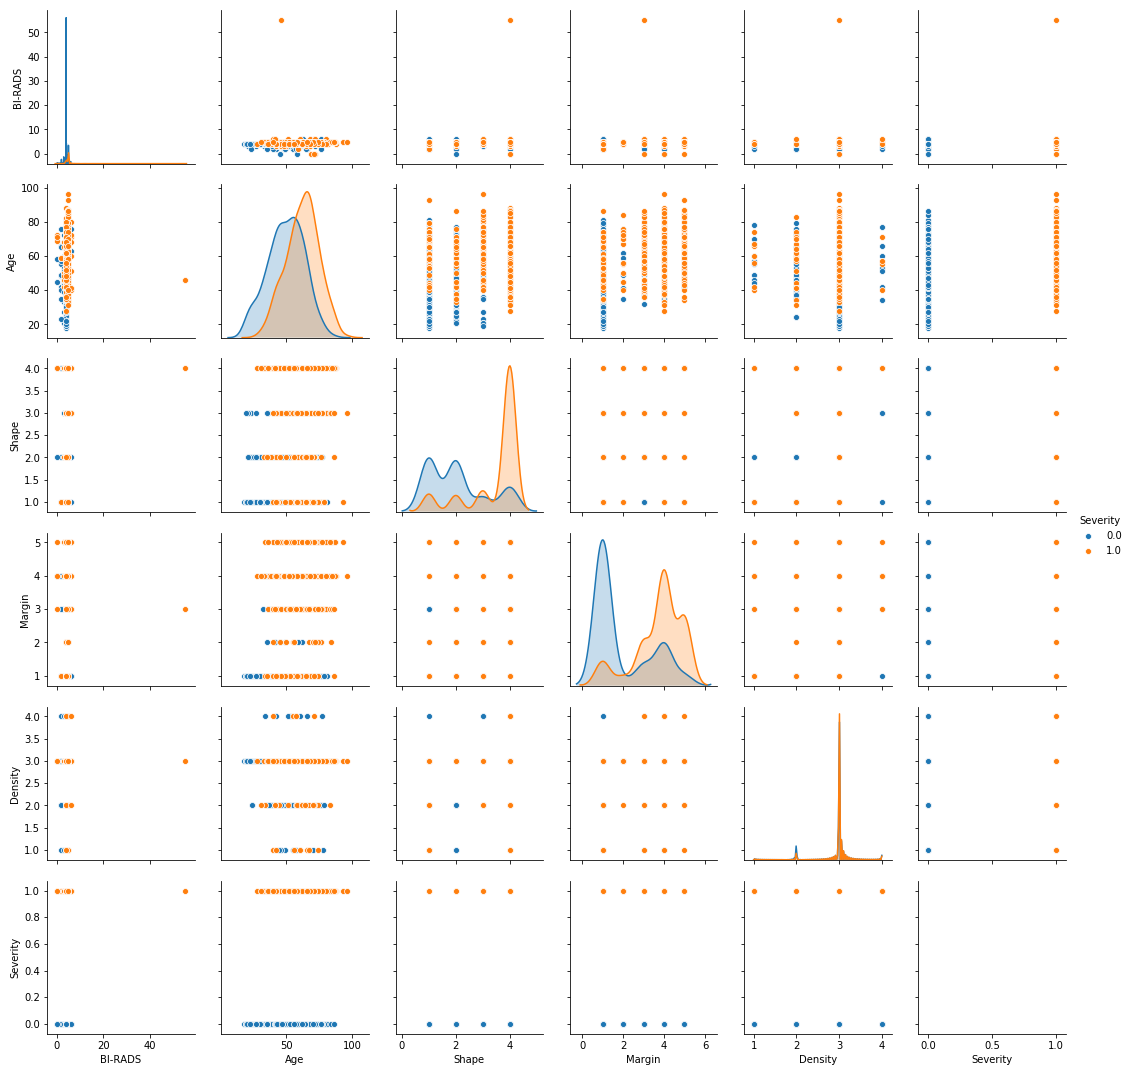

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

sb.pairplot(data,hue='Severity')
data.isna().sum(axis=0)

If the missing data seems randomly distributed, go ahead and drop rows with missing data. Hint: use dropna().

In [5]:
data = data.dropna()

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Create an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). You'll also need an array of the feature name labels.

In [6]:
X = data.drop(['BI-RADS','Severity'], axis=1)
Y = data['Severity']
X=X.reset_index(drop=True)
Y=Y.reset_index(drop=True)

In [7]:
names = data.columns.drop(['BI-RADS','Severity'])

Some of our models require the input data to be normalized, so go ahead and normalize the attribute data. Hint: use preprocessing.StandardScaler().

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.fit_transform(X)
df_feat = pd.DataFrame(scaled_features,columns=names)
X=df_feat


## Neural Networks

You can use Tensorflow to set up a neural network with 1 binary output neuron and see how it performs. Don't be afraid to run a large number of epochs to train the model if necessary. As a bonus, try to optimize this model's hyperparameters using GA.

In [9]:
import tensorflow as tf
import GA
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
data.columns

Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], dtype='object')

In [50]:
age = tf.feature_column.numeric_column("Age")
shape = tf.feature_column.numeric_column("Shape")
margin = tf.feature_column.numeric_column("Margin")
density = tf.feature_column.numeric_column("Density")

feat_cols = [age,shape,margin,density]

## Functions for hyperparameters adjustment

In [58]:
#Função que cria a população inicial
#parameters=[learning_rate,num_nodes,num_hidden_l,activation_fun]
def create_new_population ():
    
    population=[]
    
    for i in range(10):
        cromo=[]
        cromo.append(np.random.uniform(low=10**-2, high=10**-1))
        cromo.append(np.random.choice([1, 2, 4, 8, 16, 32, 64, 128, 256]))
        cromo.append(np.random.randint(low=1, high=20))
        cromo.append(np.random.randint(low=0, high=2))
        population.append(cromo)
        
    return np.array(population)
        


#Função genérica que atualiza os argumentos do classifier
#parameters=[learning_rate,num_nodes,num_hidden_l,activation_fun]
def update_classifier_parameters (parameters):
    h_u=[]
    for i in range(int(parameters[2])):
        h_u.append(parameters[1])
    
    if((parameters[3]) == 0): a_f = tf.nn.softmax
    if((parameters[3]) == 1): a_f = tf.nn.relu
    if((parameters[3]) == 2): a_f = tf.nn.leaky_relu
    
    classifier = tf.estimator.DNNClassifier(hidden_units=h_u,
                                           n_classes=2,
                                           feature_columns=feat_cols,
                                           activation_fn=a_f,
                                           optimizer=tf.train.AdamOptimizer(
                                              learning_rate=parameters[0]
                                           ))
    print(h_u)
    print(type(a_f))
    return classifier

def select_mating_pool(pop, fitness, parents_fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    #parents_fitness=[] - strangely not working good
    for parent_num in range(num_parents):
        #save fitness values of best parents
        parents_fitness.append(np.max(fitness))
        #save best parents
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
        
    return parents


def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        
        # Select which gene to mutate
        select_gene = np.random.randint(low=0, high=4)
        
        if(select_gene == 0):
            #Learning rate mutation
            random_value = np.random.uniform(low=10**-2, high=10**-1)
            offspring_crossover[idx,0] = random_value
        if(select_gene == 1):
            #num_nodes_per_layer mutation
            random_value = np.random.choice([1, 2, 4, 8, 16, 32, 64, 128, 256])
            offspring_crossover[idx,1] = random_value
        if(select_gene == 2):
            #num_hidden_layers
            random_value = np.random.randint(low=1, high=20)
            offspring_crossover[idx,2] = random_value
        if(select_gene == 3):
            #activation function mutation
            random_value = np.random.randint(low=0, high=2)
            offspring_crossover[idx,3] = random_value
            
    return offspring_crossover
              

## Build and validate ANN for a given chromosome

In [59]:
def classify_create_folds(cromossoma):
    fold = 0
    all_test_samples=[]
    predicted_labels=[]
    scores=[]
    
    classifier = update_classifier_parameters(cromossoma)

    for train_index, test_index in kf.split(X):
        fold+=1
        print("Fold#{}".format(fold))

        X_train = X.values[train_index]
        y_train = Y[train_index]
        X_test = X.values[test_index]
        y_test = Y[test_index]

        X_train_df = pd.DataFrame(X_train,columns=names,index=train_index)
        X_test_df = pd.DataFrame(X_test,columns=names,index=test_index)
        #print(X_train_df,y_train)
        #print(X_test_df,y_test)

        #defining input function to feed the classifier with training data
        input_func = tf.estimator.inputs.pandas_input_fn(x=X_train_df,y=y_train,batch_size=20,shuffle=True)

        #train the model
        classifier.train(input_fn=input_func,steps=500)

        #defining input function to feed the classifer with testing data
        pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_test_df,batch_size=len(X_test_df),shuffle=False)

        #make predictions based on testing data
        note_predictions = list(classifier.predict(input_fn=pred_fn))

        #extract the labels
        final_preds=[]
        for pred in note_predictions:
            final_preds.append(pred['class_ids'][0])

        #Adding all accuracy values to an array
        acc = accuracy_score(y_test,final_preds)
        print(acc)
        scores.append(acc)
        print("Fold-{}".format(fold),"Accuracy#{}".format(acc))

        #Adding all testing samples and calculate the accuracy later 
       #all_test_samples.append(y_test)
       #predicted_labels.append(final_preds)
        


    #Evaluate all 10 folds performance
   # #all_test_sample = np.concatenate(all_test_samples)
   # predicted_labels = np.concatenate(predicted_labels)
   # score = accuracy_score(all_test_sample,predicted_labels)
   # print("Final score (accuracy: {})".format(score))
    
    #print("Final score using average (accuracy: {})".format(sum(scores)/len(scores))
    return sum(scores)/len(scores)

    
    

    

## Hyperparameters otimization using Genetic Algorithm 

In [62]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)

new_population = create_new_population()
print(new_population)
num_parents_mating = 5
num_generations = 10
#number of genes for each chromosome
num_genes = 4 
#number of chromosomes for each population
num_chromosomes = 10 
pop_size=(num_chromosomes,num_genes)
#fitness values for each chromosome for the current generation
fitness_values = []
#fitness vaalues for each chromosome of the last generation
last_fitness_values = []
gen = 0
cromo = 0
parents=[]
#Parents fitness so we do not repeat calculations on parents
parents_fitness = []


for generation in range(num_generations):
    gen+=1
    cromo = 0
    
    for cromossoma in new_population:
        cromo+=1
        score=-1
        parentNumber=0
        
        # If it's a known chromosome we dont need to train the ANN again
        # Skips the first generation because we didnt select the parents yet
        for savedCromo in parents:
            parentNumber+=1
            if (np.array_equal(cromossoma,savedCromo)):
                score = parents_fitness[parentNumber-1]
                print(savedCromo, "CROMOSSOMA CONHECIDO")
                print(score, "SCORE CONHECIDO")

        
        #If it's a new chromosome we need to train the ANN in order to get the accuracy
        if (score < 0):
            score = classify_create_folds(cromossoma)
            
        print("Generation-{}".format(gen),"Cromossoma-{}".format(cromo),"scored",score)
        #Keep the scores in fitness_values
        fitness_values.append(score)

        print(cromossoma)
        
    #print(new_population)
    #print(fitness_values)
    #We store last generation in other array because fitness_values is changed by the selec_mating_pool
    if(gen == num_generations):
        for i in fitness_values:
            last_fitness_values.append(i)
            
    print(fitness_values,"FITNESS_VALUES")
    print(last_fitness_values,"LAST_FITNESS_VALUES")
    parents_fitness=[]
    parents = select_mating_pool(new_population,fitness_values,parents_fitness,num_parents_mating)
    #print(parents)
    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                        offspring_size=(pop_size[0]-parents.shape[0], num_genes))

    #print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation #mudar para offspring_mutation quando mutation funcionar
    
    #Reset fitness_values
    fitness_values=[]

#Getting the best solution
print(new_population)
best_solution = new_population[last_fitness_values.index(np.max(last_fitness_values))]
print("The best hyperparameters obtained are",best_solution,"with an accuracy of",np.max(last_fitness_values))

    

    
    

[[7.50060290e-02 1.28000000e+02 3.00000000e+00 0.00000000e+00]
 [1.14092068e-02 1.60000000e+01 2.00000000e+00 0.00000000e+00]
 [7.04456854e-02 1.60000000e+01 1.00000000e+00 1.00000000e+00]
 [9.79253427e-02 2.56000000e+02 1.50000000e+01 1.00000000e+00]
 [6.23189042e-02 8.00000000e+00 8.00000000e+00 0.00000000e+00]
 [3.71557973e-02 3.20000000e+01 1.30000000e+01 0.00000000e+00]
 [1.42049471e-02 1.28000000e+02 1.60000000e+01 1.00000000e+00]
 [4.04020291e-02 1.00000000e+00 3.00000000e+00 0.00000000e+00]
 [8.44302951e-02 2.56000000e+02 6.00000000e+00 1.00000000e+00]
 [3.64907818e-02 1.28000000e+02 6.00000000e+00 1.00000000e+00]]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmpw4lxcb6n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ON

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpw4lxcb6n\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7228915662650602
Fold-7 Accuracy#0.7228915662650602
Fold#8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpw4lxcb6n\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpw4lxcb6n\model.ckpt.
INFO:tensorflow:loss = 9.918763, step = 266
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpw4lxcb6n\model.ckpt.
INFO:tensorflow:Loss for final step: 3.1345727.
INFO:tensorflow:Calling model_fn.
INF

INFO:tensorflow:Done running local_init_op.
0.8192771084337349
Fold-4 Accuracy#0.8192771084337349
Fold#5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpfmr14k3t\model.ckpt-152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpfmr14k3t\model.ckpt.
INFO:tensorflow:loss = 6.1290364, step = 152
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmpfmr14k3t\model.ckpt.
INFO:tensorflow:Loss for final step: 4.133816.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpfmr14k3t\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmprle_pph6\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmprle_pph6\model.ckpt.
INFO:tensorflow:loss = 8.488163, step = 38
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmprle_pph6\model.ckpt.
INFO:tensorflow:Loss for final step: 4.7075467.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmprle_pph6\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7831325301204819
Fold-2 Accuracy#0.7831325301204819
Fold#3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

INFO:tensorflow:Saving checkpoints for 342 into C:\Users\jose\AppData\Local\Temp\tmprle_pph6\model.ckpt.
INFO:tensorflow:loss = 8.306249, step = 342
INFO:tensorflow:Saving checkpoints for 380 into C:\Users\jose\AppData\Local\Temp\tmprle_pph6\model.ckpt.
INFO:tensorflow:Loss for final step: 1.946151.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmprle_pph6\model.ckpt-380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7710843373493976
Fold-10 Accuracy#0.7710843373493976
Generation-1 Cromossoma-3 scored 0.8024096385542169
[ 0.07044569 16.          1.          1.        ]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmpadkx31b2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs'

INFO:tensorflow:loss = 14.630318, step = 228
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpadkx31b2\model.ckpt.
INFO:tensorflow:Loss for final step: 4.8033915.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpadkx31b2\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.4939759036144578
Fold-7 Accuracy#0.4939759036144578
Fold#8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpadkx31b2\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpadkx31b2\model.ckpt.
IN

INFO:tensorflow:Loss for final step: 2.9915147.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmps0jylx5r\model.ckpt-152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7710843373493976
Fold-4 Accuracy#0.7710843373493976
Fold#5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmps0jylx5r\model.ckpt-152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmps0jylx5r\model.ckpt.
INFO:tensorflow:loss = 9.887315, step = 152
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmps0jylx5r\model.ckpt.
INF

INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp178t51xg\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.46987951807228917
Fold-1 Accuracy#0.46987951807228917
Fold#2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp178t51xg\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmp178t51xg\model.ckpt.
INFO:tensorflow:loss = 14.157211, step = 38
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmp178t51xg\model.ckpt.
INFO:tensorflow:Loss for final step: 4.793245.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:t

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp178t51xg\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 342 into C:\Users\jose\AppData\Local\Temp\tmp178t51xg\model.ckpt.
INFO:tensorflow:loss = 13.868065, step = 342
INFO:tensorflow:Saving checkpoints for 380 into C:\Users\jose\AppData\Local\Temp\tmp178t51xg\model.ckpt.
INFO:tensorflow:Loss for final step: 4.6878753.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp178t51xg\model.ckpt-380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.4819277108433735
Fold-10 Accuracy#0.4819277108433735
Generati

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpek9s5wda\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmpek9s5wda\model.ckpt.
INFO:tensorflow:loss = 14.336069, step = 228
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpek9s5wda\model.ckpt.
INFO:tensorflow:Loss for final step: 3.6870265.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpek9s5wda\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7590361445783133
Fold-7 Accuracy#0.7590361445783133
Fold#8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
IN

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmpb3hwkklt\model.ckpt.
INFO:tensorflow:loss = 13.939757, step = 114
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpb3hwkklt\model.ckpt.
INFO:tensorflow:Loss for final step: 4.878444.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpb3hwkklt\model.ckpt-152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.43373493975903615
Fold-4 Accuracy#0.43373493975903615
Fold#5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpb3hwkklt\model.ckpt-152
INFO:tensorflow:Running local_init_op.
I

INFO:tensorflow:loss = 13.886782, step = 0
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpb6tsjpb7\model.ckpt.
INFO:tensorflow:Loss for final step: 36.739456.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpb6tsjpb7\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.5301204819277109
Fold-1 Accuracy#0.5301204819277109
Fold#2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpb6tsjpb7\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpb6tsjpb7\model.ckpt.
INFO:ten

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpb6tsjpb7\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.5301204819277109
Fold-9 Accuracy#0.5301204819277109
Fold#10
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpb6tsjpb7\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 342 into C:\Users\jose\AppData\Local\Temp\tmpb6tsjpb7\model.ckpt.
INFO:tensorflow:loss = 13.800491, step = 342
INFO:tensorflow:Saving checkpoints for 380 into C:\Users\jose\AppData\Local\Temp\tmpb6tsjpb7\model.ckpt.
INFO:tensorflow:Loss for final step: 4.572487.
INFO:tensorflow:Calling model_fn.
IN

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7469879518072289
Fold-6 Accuracy#0.7469879518072289
Fold#7
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp6rtswvqk\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmp6rtswvqk\model.ckpt.
INFO:tensorflow:loss = 12.9945, step = 228
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmp6rtswvqk\model.ckpt.
INFO:tensorflow:Loss for final step: 3.8912244.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp6rtswvqk\model.ckpt-266
INFO

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpzt19cb8y\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7710843373493976
Fold-2 Accuracy#0.7710843373493976
Fold#3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpzt19cb8y\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmpzt19cb8y\model.ckpt.
INFO:tensorflow:loss = 12.791893, step = 76
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmpzt19cb8y\model.ckpt.
INFO:tensorflow:Loss for final step: 5.1122246.
INFO:tensorflow:Calling model_fn.
INFO:t

0.7469879518072289
Fold-10 Accuracy#0.7469879518072289
Generation-2 Cromossoma-6 scored 0.808433734939759
[ 0.07044569 16.          2.          0.        ]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmpa2cxilwb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002281A670908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': Tru

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpa2cxilwb\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpa2cxilwb\model.ckpt.
INFO:tensorflow:loss = 12.801937, step = 266
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpa2cxilwb\model.ckpt.
INFO:tensorflow:Loss for final step: 2.0838313.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpa2cxilwb\model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8554216867469879
Fold-8 Accuracy#0.8554216867469879
Fold#9
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
IN

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpsqst0td2\model.ckpt.
INFO:tensorflow:loss = 13.907689, step = 152
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmpsqst0td2\model.ckpt.
INFO:tensorflow:Loss for final step: 4.8183765.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpsqst0td2\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.4819277108433735
Fold-5 Accuracy#0.4819277108433735
Fold#6
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpsqst0td2\model.ckpt-190
IN

INFO:tensorflow:loss = 13.884097, step = 38
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmprnp69131\model.ckpt.
INFO:tensorflow:Loss for final step: 4.825941.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmprnp69131\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.5783132530120482
Fold-2 Accuracy#0.5783132530120482
Fold#3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmprnp69131\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmprnp69131\model.ckpt.
INFO:ten

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmprnp69131\model.ckpt-380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.5180722891566265
Fold-10 Accuracy#0.5180722891566265
Generation-2 Cromossoma-9 scored 0.5012048192771085
[ 0.07500603  1.         16.          1.        ]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmpyjr6wusb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimenta

INFO:tensorflow:Done running local_init_op.
0.7831325301204819
Fold-7 Accuracy#0.7831325301204819
Fold#8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpyjr6wusb\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpyjr6wusb\model.ckpt.
INFO:tensorflow:loss = 10.287574, step = 266
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpyjr6wusb\model.ckpt.
INFO:tensorflow:Loss for final step: 1.2710128.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpyjr6wusb\model.ckpt-304
INFO:tensorflow:Running local_init_op.
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpcsi0pr4e\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8072289156626506
Fold-3 Accuracy#0.8072289156626506
Fold#4
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpcsi0pr4e\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmpcsi0pr4e\model.ckpt.
INFO:tensorflow:loss = 12.716695, step = 114
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpcsi0pr4e\model.ckpt.
INFO:tensorflow:Loss for final step: 1.7301642.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
IN

[64.0]
<class 'function'>
Fold#1
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jose\AppData\Local\Temp\tmpjd82iaea\model.ckpt.
INFO:tensorflow:loss = 13.430574, step = 0
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpjd82iaea\model.ckpt.
INFO:tensorflow:Loss for final step: 3.3603692.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpjd82iaea\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7228915662650602
Fold-1 Accuracy#0.7228915662650602
Fold#2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO

INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpjd82iaea\model.ckpt.
INFO:tensorflow:loss = 4.5524273, step = 304
INFO:tensorflow:Saving checkpoints for 342 into C:\Users\jose\AppData\Local\Temp\tmpjd82iaea\model.ckpt.
INFO:tensorflow:Loss for final step: 5.7267776.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpjd82iaea\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8795180722891566
Fold-9 Accuracy#0.8795180722891566
Fold#10
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpjd82iaea\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:Loss for final step: 2.479456.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpgy6fdlsc\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7469879518072289
Fold-6 Accuracy#0.7469879518072289
Fold#7
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpgy6fdlsc\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmpgy6fdlsc\model.ckpt.
INFO:tensorflow:loss = 6.4052515, step = 228
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpgy6fdlsc\model.ckpt.
INF

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8554216867469879
Fold-3 Accuracy#0.8554216867469879
Fold#4
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpfplej487\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmpfplej487\model.ckpt.
INFO:tensorflow:loss = 9.014217, step = 114
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpfplej487\model.ckpt.
INFO:tensorflow:Loss for final step: 1.5481039.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpfplej487\model.ckpt-152
INF

[8.0, 8.0]
<class 'function'>
Fold#1
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jose\AppData\Local\Temp\tmpx12no4u3\model.ckpt.
INFO:tensorflow:loss = 14.043709, step = 0
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpx12no4u3\model.ckpt.
INFO:tensorflow:Loss for final step: 4.4991217.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpx12no4u3\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.6385542168674698
Fold-1 Accuracy#0.6385542168674698
Fold#2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpx12no4u3\model.ckpt.
INFO:tensorflow:loss = 6.0766068, step = 304
INFO:tensorflow:Saving checkpoints for 342 into C:\Users\jose\AppData\Local\Temp\tmpx12no4u3\model.ckpt.
INFO:tensorflow:Loss for final step: 1.3731649.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpx12no4u3\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8795180722891566
Fold-9 Accuracy#0.8795180722891566
Fold#10
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpx12no4u3\model.ckpt-342
INFO:tensorflow:Running local_init_op.
I

INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpi4uyu107\model.ckpt-152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpi4uyu107\model.ckpt.
INFO:tensorflow:loss = 14.148734, step = 152
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmpi4uyu107\model.ckpt.
INFO:tensorflow:Loss for final step: 2.004874.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpi4uyu107\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8072289156626506
Fold-5 Accuracy#0.8072289156626506
Fold#6
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INF

INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpacucvkkt\model.ckpt.
INFO:tensorflow:loss = 7.1021028, step = 38
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmpacucvkkt\model.ckpt.
INFO:tensorflow:Loss for final step: 2.7416933.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpacucvkkt\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7590361445783133
Fold-2 Accuracy#0.7590361445783133
Fold#3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpacucvkkt\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:te

INFO:tensorflow:Loss for final step: 2.2264993.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpacucvkkt\model.ckpt-380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7831325301204819
Fold-10 Accuracy#0.7831325301204819
Generation-4 Cromossoma-7 scored 0.8036144578313253
[8.02455014e-02 1.28000000e+02 2.00000000e+00 0.00000000e+00]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmpi0xgr1qz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_dis

INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpi0xgr1qz\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.4939759036144578
Fold-7 Accuracy#0.4939759036144578
Fold#8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpi0xgr1qz\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpi0xgr1qz\model.ckpt.
INFO:tensorflow:loss = 13.979507, step = 266
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpi0xgr1qz\model.ckpt.
INFO:tensorflow:Loss for final step: 5.252851.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INF

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp8_y9kj0z\model.ckpt-152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmp8_y9kj0z\model.ckpt.
INFO:tensorflow:loss = 12.287782, step = 152
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmp8_y9kj0z\model.ckpt.
INFO:tensorflow:Loss for final step: 5.4668097.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp8_y9kj0z\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8433734939759037
Fold-5 Accuracy#0.8433734939759037
Fold#6
INFO:tensorflow:Calling model_fn.
IN

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpnda1nvea\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpnda1nvea\model.ckpt.
INFO:tensorflow:loss = 14.262327, step = 38
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmpnda1nvea\model.ckpt.
INFO:tensorflow:Loss for final step: 4.840041.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpnda1nvea\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.5783132530120482
Fold-2 Accuracy#0.5783132530120482
Fold#3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:ten

INFO:tensorflow:Saving checkpoints for 342 into C:\Users\jose\AppData\Local\Temp\tmpnda1nvea\model.ckpt.
INFO:tensorflow:loss = 14.03158, step = 342
INFO:tensorflow:Saving checkpoints for 380 into C:\Users\jose\AppData\Local\Temp\tmpnda1nvea\model.ckpt.
INFO:tensorflow:Loss for final step: 4.775504.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpnda1nvea\model.ckpt-380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.5180722891566265
Fold-10 Accuracy#0.5180722891566265
Generation-4 Cromossoma-10 scored 0.5144578313253012
[1.42049471e-02 1.28000000e+02 1.50000000e+01 0.00000000e+00]
[0.808433734939759, 0.8072289156626505, 0.8048192771084338, 0.8036144578313256, 0.8036144578313253, 0.7951807228915662, 0.8036144578313253, 0.4951807228915662, 0.8084337349397591, 0.5144578313253012] FITNESS_VALUES
[] LAST_FITNESS_VAL

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmpv8isurj2\model.ckpt.
INFO:tensorflow:loss = 8.085741, step = 190
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmpv8isurj2\model.ckpt.
INFO:tensorflow:Loss for final step: 1.4355032.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpv8isurj2\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7469879518072289
Fold-6 Accuracy#0.7469879518072289
Fold#7
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpv8isurj2\model.ckpt-228
INF

INFO:tensorflow:loss = 13.351761, step = 76
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmpz2wlwwol\model.ckpt.
INFO:tensorflow:Loss for final step: 4.165541.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpz2wlwwol\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8554216867469879
Fold-3 Accuracy#0.8554216867469879
Fold#4
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpz2wlwwol\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmpz2wlwwol\model.ckpt.
INFO

[128.0, 128.0, 128.0, 128.0]
<class 'function'>
Fold#1
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jose\AppData\Local\Temp\tmpbej9e29n\model.ckpt.
INFO:tensorflow:loss = 13.856272, step = 0
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpbej9e29n\model.ckpt.
INFO:tensorflow:Loss for final step: 4.897545.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpbej9e29n\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.46987951807228917
Fold-1 Accuracy#0.46987951807228917
Fold#2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpbej9e29n\model.ckpt.
INFO:tensorflow:loss = 9.364056, step = 304
INFO:tensorflow:Saving checkpoints for 342 into C:\Users\jose\AppData\Local\Temp\tmpbej9e29n\model.ckpt.
INFO:tensorflow:Loss for final step: 4.163174.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpbej9e29n\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.891566265060241
Fold-9 Accuracy#0.891566265060241
Fold#10
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpbej9e29n\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:

INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmpyfgaphe9\model.ckpt.
INFO:tensorflow:Loss for final step: 2.4853144.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpyfgaphe9\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7590361445783133
Fold-6 Accuracy#0.7590361445783133
Fold#7
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpyfgaphe9\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmpyfgaphe9\model.ckpt.
INFO:tensorflow:loss = 9.731762, step = 228
INF

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpbwrqxopw\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.891566265060241
Fold-3 Accuracy#0.891566265060241
Fold#4
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpbwrqxopw\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmpbwrqxopw\model.ckpt.
INFO:tensorflow:loss = 12.82855, step = 114
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpbwrqxopw\model.ckpt.
INFO:tensorflow:Loss for final step: 2.5065796.
INFO:

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmp0c08xjnf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002282BC56FD0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
[16.0]
<class 'function'>
Fold#1
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSa

INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmp0c08xjnf\model.ckpt.
INFO:tensorflow:loss = 8.355145, step = 266
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmp0c08xjnf\model.ckpt.
INFO:tensorflow:Loss for final step: 6.726845.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp0c08xjnf\model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8554216867469879
Fold-8 Accuracy#0.8554216867469879
Fold#9
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp0c08xjnf\model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpujfd23zy\model.ckpt.
INFO:tensorflow:loss = 13.558445, step = 152
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmpujfd23zy\model.ckpt.
INFO:tensorflow:Loss for final step: 4.833275.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpujfd23zy\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.4819277108433735
Fold-5 Accuracy#0.4819277108433735
Fold#6
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpujfd23zy\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INF

INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmpncx2bww7\model.ckpt.
INFO:tensorflow:Loss for final step: 3.0179749.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpncx2bww7\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7831325301204819
Fold-2 Accuracy#0.7831325301204819
Fold#3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpncx2bww7\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmpncx2bww7\model.ckpt.
INFO:tensorflow:loss = 13.168453, step = 76
INFO:te

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpncx2bww7\model.ckpt-380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7831325301204819
Fold-10 Accuracy#0.7831325301204819
Generation-6 Cromossoma-9 scored 0.8144578313253013
[2.90000955e-02 1.28000000e+02 2.00000000e+00 0.00000000e+00]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmpnemvvk1l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_serv

0.7590361445783133
Fold-7 Accuracy#0.7590361445783133
Fold#8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpnemvvk1l\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpnemvvk1l\model.ckpt.
INFO:tensorflow:loss = 6.761073, step = 266
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpnemvvk1l\model.ckpt.
INFO:tensorflow:Loss for final step: 3.5444775.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpnemvvk1l\model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmppt_6ijcv\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8795180722891566
Fold-3 Accuracy#0.8795180722891566
Fold#4
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmppt_6ijcv\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmppt_6ijcv\model.ckpt.
INFO:tensorflow:loss = 5.670064, step = 114
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmppt_6ijcv\model.ckpt.
INFO:tensorflow:Loss for final step: 2.322106.
INFO

[128.0]
<class 'function'>
Fold#1
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jose\AppData\Local\Temp\tmp1fye9rm9\model.ckpt.
INFO:tensorflow:loss = 13.873367, step = 0
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmp1fye9rm9\model.ckpt.
INFO:tensorflow:Loss for final step: 3.998062.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp1fye9rm9\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7469879518072289
Fold-1 Accuracy#0.7469879518072289
Fold#2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO

INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmp1fye9rm9\model.ckpt.
INFO:tensorflow:loss = 6.1938715, step = 304
INFO:tensorflow:Saving checkpoints for 342 into C:\Users\jose\AppData\Local\Temp\tmp1fye9rm9\model.ckpt.
INFO:tensorflow:Loss for final step: 5.6396036.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp1fye9rm9\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.9036144578313253
Fold-9 Accuracy#0.9036144578313253
Fold#10
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp1fye9rm9\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
I

INFO:tensorflow:Loss for final step: 1.4005766.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpk5nr9aw0\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7469879518072289
Fold-6 Accuracy#0.7469879518072289
Fold#7
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpk5nr9aw0\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmpk5nr9aw0\model.ckpt.
INFO:tensorflow:loss = 4.4175634, step = 228
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpk5nr9aw0\model.ckpt.
IN

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8674698795180723
Fold-3 Accuracy#0.8674698795180723
Fold#4
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp0zvdd_ti\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmp0zvdd_ti\model.ckpt.
INFO:tensorflow:loss = 6.354254, step = 114
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmp0zvdd_ti\model.ckpt.
INFO:tensorflow:Loss for final step: 7.453985.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp0zvdd_ti\model.ckpt-152
INFO

[64.0, 64.0]
<class 'function'>
Fold#1
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jose\AppData\Local\Temp\tmpet2iha5n\model.ckpt.
INFO:tensorflow:loss = 13.876666, step = 0
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpet2iha5n\model.ckpt.
INFO:tensorflow:Loss for final step: 5.723892.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpet2iha5n\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7469879518072289
Fold-1 Accuracy#0.7469879518072289
Fold#2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpet2iha5n\model.ckpt.
INFO:tensorflow:loss = 10.138372, step = 304
INFO:tensorflow:Saving checkpoints for 342 into C:\Users\jose\AppData\Local\Temp\tmpet2iha5n\model.ckpt.
INFO:tensorflow:Loss for final step: 3.6841726.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpet2iha5n\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.891566265060241
Fold-9 Accuracy#0.891566265060241
Fold#10
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpet2iha5n\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INF

INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpl4h3qjdm\model.ckpt-152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpl4h3qjdm\model.ckpt.
INFO:tensorflow:loss = 3.9798121, step = 152
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmpl4h3qjdm\model.ckpt.
INFO:tensorflow:Loss for final step: 3.334836.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpl4h3qjdm\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8433734939759037
Fold-5 Accuracy#0.8433734939759037
Fold#6
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INF

INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpzmjithnq\model.ckpt.
INFO:tensorflow:loss = 13.158178, step = 38
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmpzmjithnq\model.ckpt.
INFO:tensorflow:Loss for final step: 4.5013623.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpzmjithnq\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7710843373493976
Fold-2 Accuracy#0.7710843373493976
Fold#3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpzmjithnq\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:te

INFO:tensorflow:Loss for final step: 3.183258.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpzmjithnq\model.ckpt-380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7710843373493976
Fold-10 Accuracy#0.7710843373493976
Generation-8 Cromossoma-7 scored 0.7903614457831325
[1.25599071e-02 6.40000000e+01 2.00000000e+00 0.00000000e+00]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmpq8gi988n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_dist

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7710843373493976
Fold-7 Accuracy#0.7710843373493976
Fold#8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpq8gi988n\model.ckpt-266
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpq8gi988n\model.ckpt.
INFO:tensorflow:loss = 8.700935, step = 266
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpq8gi988n\model.ckpt.
INFO:tensorflow:Loss for final step: 1.5250137.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpq8gi988n\model.ckpt-304
INF

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpd8zb3gfi\model.ckpt-152
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpd8zb3gfi\model.ckpt.
INFO:tensorflow:loss = 12.464528, step = 152
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmpd8zb3gfi\model.ckpt.
INFO:tensorflow:Loss for final step: 3.0951476.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpd8zb3gfi\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8433734939759037
Fold-5 Accuracy#0.8433734939759037
Fold#6
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
IN

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpxlfhqyrt\model.ckpt.
INFO:tensorflow:loss = 13.766841, step = 38
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmpxlfhqyrt\model.ckpt.
INFO:tensorflow:Loss for final step: 4.860778.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpxlfhqyrt\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.5783132530120482
Fold-2 Accuracy#0.5783132530120482
Fold#3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpxlfhqyrt\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:ten

INFO:tensorflow:Loss for final step: 5.0343943.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpxlfhqyrt\model.ckpt-380
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.5180722891566265
Fold-10 Accuracy#0.5180722891566265
Generation-8 Cromossoma-10 scored 0.49638554216867475
[0.07044569 1.         2.         0.        ]
[0.8144578313253013, 0.8108433734939758, 0.8096385542168674, 0.8084337349397591, 0.8084337349397591, 0.791566265060241, 0.7903614457831325, 0.8108433734939758, 0.7734939759036145, 0.49638554216867475] FITNESS_VALUES
[] LAST_FITNESS_VALUES
[2.90000955e-02 1.28000000e+02 2.00000000e+00 0.00000000e+00] CROMOSSOMA CONHECIDO
0.8144578313253013 SCORE CONHECIDO
Generation-9 Cromossoma-1 scored 0.8144578313253013
[2.90000955e-02 1.28000000e+02 2.00000000e+00 0.00000000e+00]
[2.90000955e-02 6.40000000e+01 

INFO:tensorflow:loss = 11.282974, step = 190
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmpqri7110c\model.ckpt.
INFO:tensorflow:Loss for final step: 2.4905279.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpqri7110c\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7349397590361446
Fold-6 Accuracy#0.7349397590361446
Fold#7
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpqri7110c\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmpqri7110c\model.ckpt.
IN

INFO:tensorflow:Loss for final step: 4.7931323.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpxadnfb5t\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.4939759036144578
Fold-3 Accuracy#0.4939759036144578
Fold#4
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpxadnfb5t\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmpxadnfb5t\model.ckpt.
INFO:tensorflow:loss = 14.091219, step = 114
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpxadnfb5t\model.ckpt.
IN

[64.0, 64.0]
<class 'function'>
Fold#1
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jose\AppData\Local\Temp\tmpyahawwbd\model.ckpt.
INFO:tensorflow:loss = 14.034939, step = 0
INFO:tensorflow:Saving checkpoints for 38 into C:\Users\jose\AppData\Local\Temp\tmpyahawwbd\model.ckpt.
INFO:tensorflow:Loss for final step: 2.7218435.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpyahawwbd\model.ckpt-38
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.4457831325301205
Fold-1 Accuracy#0.4457831325301205
Fold#2
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn

INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpyahawwbd\model.ckpt.
INFO:tensorflow:loss = 10.3954935, step = 304
INFO:tensorflow:Saving checkpoints for 342 into C:\Users\jose\AppData\Local\Temp\tmpyahawwbd\model.ckpt.
INFO:tensorflow:Loss for final step: 3.5539834.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpyahawwbd\model.ckpt-342
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8795180722891566
Fold-9 Accuracy#0.8795180722891566
Fold#10
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpyahawwbd\model.ckpt-342
INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmp0xtv_803\model.ckpt.
INFO:tensorflow:Loss for final step: 3.800606.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp0xtv_803\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7590361445783133
Fold-6 Accuracy#0.7590361445783133
Fold#7
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp0xtv_803\model.ckpt-228
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmp0xtv_803\model.ckpt.
INFO:tensorflow:loss = 5.718975, step = 228
INFO

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpik1e9z6k\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8554216867469879
Fold-3 Accuracy#0.8554216867469879
Fold#4
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpik1e9z6k\model.ckpt-114
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmpik1e9z6k\model.ckpt.
INFO:tensorflow:loss = 11.017151, step = 114
INFO:tensorflow:Saving checkpoints for 152 into C:\Users\jose\AppData\Local\Temp\tmpik1e9z6k\model.ckpt.
INFO:tensorflow:Loss for final step: 3.8286047.
INFO:tensorflow:Calling model_fn.
IN

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmprk9j8zoq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002281F9C3B38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
[2.0]
<class 'function'>
Fold#1
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSav

INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmprk9j8zoq\model.ckpt.
INFO:tensorflow:loss = 10.87896, step = 266
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmprk9j8zoq\model.ckpt.
INFO:tensorflow:Loss for final step: 2.66854.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmprk9j8zoq\model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8554216867469879
Fold-8 Accuracy#0.8554216867469879
Fold#9
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmprk9j8zoq\model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:

INFO:tensorflow:Loss for final step: 2.2657323.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpon40w4m4\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8554216867469879
Fold-5 Accuracy#0.8554216867469879
Fold#6
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpon40w4m4\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmpon40w4m4\model.ckpt.
INFO:tensorflow:loss = 5.608349, step = 190
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmpon40w4m4\model.ckpt.
INF

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7710843373493976
Fold-2 Accuracy#0.7710843373493976
Fold#3
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpmfqr6szg\model.ckpt-76
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 76 into C:\Users\jose\AppData\Local\Temp\tmpmfqr6szg\model.ckpt.
INFO:tensorflow:loss = 9.567114, step = 76
INFO:tensorflow:Saving checkpoints for 114 into C:\Users\jose\AppData\Local\Temp\tmpmfqr6szg\model.ckpt.
INFO:tensorflow:Loss for final step: 8.184614.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpmfqr6szg\model.ckpt-114
INFO:te

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmpp0ujly1z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000227DF543D68>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
[4.0]
<class 'function'>
Fold#1
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSav

INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmpp0ujly1z\model.ckpt.
INFO:tensorflow:loss = 10.288062, step = 266
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmpp0ujly1z\model.ckpt.
INFO:tensorflow:Loss for final step: 5.050151.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpp0ujly1z\model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8674698795180723
Fold-8 Accuracy#0.8674698795180723
Fold#9
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpp0ujly1z\model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INF

INFO:tensorflow:Loss for final step: 3.207241.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpqg1lmclo\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8433734939759037
Fold-5 Accuracy#0.8433734939759037
Fold#6
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmpqg1lmclo\model.ckpt-190
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 190 into C:\Users\jose\AppData\Local\Temp\tmpqg1lmclo\model.ckpt.
INFO:tensorflow:loss = 7.449122, step = 190
INFO:tensorflow:Saving checkpoints for 228 into C:\Users\jose\AppData\Local\Temp\tmpqg1lmclo\model.ckpt.
INFO

## Debug stuff

In [44]:
new_population = create_new_population()
print(new_population)
fitness_values=[]
for i in range(10):
    fitness_values.append(np.random.uniform(low=0, high=1))

print(fitness_values.index(np.max(fitness_values)))

[[7.21887338e-02 4.00000000e+00 1.10000000e+01 0.00000000e+00]
 [3.85584961e-02 1.00000000e+00 1.80000000e+01 0.00000000e+00]
 [8.64826711e-02 2.56000000e+02 2.00000000e+00 1.00000000e+00]
 [7.29012636e-02 1.00000000e+00 8.00000000e+00 0.00000000e+00]
 [2.49802126e-02 3.20000000e+01 1.50000000e+01 1.00000000e+00]
 [7.28205947e-02 3.20000000e+01 7.00000000e+00 1.00000000e+00]
 [2.21798033e-02 8.00000000e+00 3.00000000e+00 1.00000000e+00]
 [2.64598010e-02 1.00000000e+00 1.70000000e+01 0.00000000e+00]
 [9.42936024e-02 6.40000000e+01 4.00000000e+00 0.00000000e+00]
 [8.70722208e-02 2.00000000e+00 1.90000000e+01 0.00000000e+00]]
3


In [364]:
parents_fitness=[]
print(type(parents_mating))
print(new_population, "POPULATION")
print(fitness_values, "FITNESS VALUES")
parents = select_mating_pool(new_population,fitness_values,num_parents_mating)
print(parents, "PARENTS")
print(parents_fitness,"MAAAATTTING")

# Generating next generation using crossover.
offspring_crossover = crossover(parents,
                                    offspring_size=(pop_size[0]-parents.shape[0], num_genes))

print(offspring_crossover, "CROSSOVER")

# Adding some variations to the offspring using mutation.
offspring_mutation = mutation(offspring_crossover)

# Creating the new population based on the parents and offspring.
new_population[0:parents.shape[0], :] = parents
new_population[parents.shape[0]:, :] = offspring_mutation #mudar para offspring_mutation quando mutation funcionar

print(new_population, "POPULATION")

<class 'list'>
[[7.81869794e-02 3.20000000e+01 1.90000000e+01 0.00000000e+00]
 [5.12846716e-02 2.56000000e+02 1.80000000e+01 1.00000000e+00]
 [8.60812989e-02 2.00000000e+00 1.00000000e+00 0.00000000e+00]
 [2.71189403e-02 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [7.15307651e-02 6.40000000e+01 1.10000000e+01 1.00000000e+00]
 [7.00866937e-02 6.40000000e+01 4.00000000e+00 1.00000000e+00]
 [5.87130588e-02 2.00000000e+00 3.00000000e+00 1.00000000e+00]
 [4.09497920e-02 6.40000000e+01 5.00000000e+00 1.00000000e+00]
 [7.26505598e-02 3.20000000e+01 1.00000000e+00 1.00000000e+00]
 [9.47201052e-02 1.60000000e+01 3.00000000e+00 1.00000000e+00]] POPULATION
[0.15274696762982776, 0.5659376599632471, 0.06535468801641775, 0.866695425532563, 0.15861068575346093, 0.6398637886730006, 0.3370767516798331, 0.7660981187819469, 0.6661207881987176, 0.8110506744810486] FITNESS VALUES
[[2.71189403e-02 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [9.47201052e-02 1.60000000e+01 3.00000000e+00 1.00000000e+00]

In [365]:
print(parents_fitness)
print(parents)

[0.866695425532563, 0.8110506744810486, 0.7660981187819469, 0.6661207881987176, 0.6398637886730006]
[[2.71189403e-02 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [9.47201052e-02 1.60000000e+01 3.00000000e+00 1.00000000e+00]
 [4.09497920e-02 6.40000000e+01 5.00000000e+00 1.00000000e+00]
 [7.26505598e-02 3.20000000e+01 1.00000000e+00 1.00000000e+00]
 [7.00866937e-02 6.40000000e+01 4.00000000e+00 1.00000000e+00]]


In [61]:
classify_create_folds([1.51447065e-02,1.28000000e+02,7.00000000e+00,1.00000000e+00])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jose\\AppData\\Local\\Temp\\tmp5bdg79gz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002282E49EE48>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
[128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128.0]
<class 'function'>
Fold#1
INFO:tensorflow:Calling mod

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 266 into C:\Users\jose\AppData\Local\Temp\tmp5bdg79gz\model.ckpt.
INFO:tensorflow:loss = 7.3697414, step = 266
INFO:tensorflow:Saving checkpoints for 304 into C:\Users\jose\AppData\Local\Temp\tmp5bdg79gz\model.ckpt.
INFO:tensorflow:Loss for final step: 2.7014227.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp5bdg79gz\model.ckpt-304
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8192771084337349
Fold-8 Accuracy#0.8192771084337349
Fold#9
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jose\AppData\Local\Temp\tmp5bdg79gz\model.ckpt-304
IN

0.7903614457831326

In [47]:
np.array_equal([0.05062886,8,5,1],[0.05062886,8,5,1])

True